In [1]:
! pip install kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ujwalamore","key":"72a0df62698007c4062d5cca651ed0f2"}'}

In [3]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets list

ref                                                     title                                          size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------  --------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/apple-quality                          Apple Quality                                 170KB  2024-01-11 14:31:07          16548        368  1.0              
mikhail1681/walmart-sales                               Walmart Sales                                 122KB  2024-02-13 17:35:56           1172         25  1.0              
imtkaggleteam/airplane-crashes                          Airplane Crashes ðŸ›«                            564KB  2024-02-15 21:00:38           1009         46  1.0              
kapoorprakhar/college-placement-dataset                 College Placement Dataset                      324B  2024-02-15 18:27:2

In [7]:
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

 99% 606M/612M [00:10<00:00, 108MB/s]
100% 612M/612M [00:10<00:00, 61.2MB/s]


In [8]:
!unzip gtsrb-german-traffic-sign.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/5/00005_00053_00010.png  
  inflating: train/5/00005_00053_00011.png  
  inflating: train/5/00005_00053_00012.png  
  inflating: train/5/00005_00053_00013.png  
  inflating: train/5/00005_00053_00014.png  
  inflating: train/5/00005_00053_00015.png  
  inflating: train/5/00005_00053_00016.png  
  inflating: train/5/00005_00053_00017.png  
  inflating: train/5/00005_00053_00018.png  
  inflating: train/5/00005_00053_00019.png  
  inflating: train/5/00005_00053_00020.png  
  inflating: train/5/00005_00053_00021.png  
  inflating: train/5/00005_00053_00022.png  
  inflating: train/5/00005_00053_00023.png  
  inflating: train/5/00005_00053_00024.png  
  inflating: train/5/00005_00053_00025.png  
  inflating: train/5/00005_00053_00026.png  
  inflating: train/5/00005_00053_00027.png  
  inflating: train/5/00005_00053_00028.png  
  inflating: train/5/00005_00053_00029.png  
  inflating: train/5/00005_00054_00000.png  
  in

In [9]:
from keras.applications.mobilenet_v2 import MobileNetV2

In [10]:
model = MobileNetV2(weights='imagenet')

14536120/14536120 [==============================] - 0s 0us/step


In [11]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[

In [12]:
import os
import numpy as np
import random as rn
import pandas as pd
import tensorflow as tf
from imageio import imread
from tensorflow import keras


import plotly.subplots as sp
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from PIL import Image
from IPython.display import SVG
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img
from keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.utils import model_to_dot, plot_model
import tensorflow.keras.utils as Utils

from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization, Flatten, Dense


from keras.models import Sequential
from tensorflow.keras.models import save_model



In [13]:
meta_df = pd.read_csv('/content/Meta.csv')
train_df = pd.read_csv('/content/Train.csv')
test_df = pd.read_csv('/content/Test.csv')

In [14]:
data_path = '/content/'
train_data_path = os.path.join(data_path, 'train')
test_data_path = os.path.join(data_path, 'test')
meta_data_path = os.path.join(data_path, 'meta')

height = 50
width = 50

In [15]:
batch_size = 150
seed = 42

In [16]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)',
            2:'Speed limit (50km/h)',
            3:'Speed limit (60km/h)',
            4:'Speed limit (70km/h)',
            5:'Speed limit (80km/h)',
            6:'End of speed limit (80km/h)',
            7:'Speed limit (100km/h)',
            8:'Speed limit (120km/h)',
            9:'No passing',
            10:'No passing veh over 3.5 tons',
            11:'Right-of-way at intersection',
            12:'Priority road',
            13:'Yield',
            14:'Stop',
            15:'No vehicles',
            16:'Veh > 3.5 tons prohibited',
            17:'No entry',
            18:'General caution',
            19:'Dangerous curve left',
            20:'Dangerous curve right',
            21:'Double curve',
            22:'Bumpy road',
            23:'Slippery road',
            24:'Road narrows on the right',
            25:'Road work',
            26:'Traffic signals',
            27:'Pedestrians',
            28:'Children crossing',
            29:'Bicycles crossing',
            30:'Beware of ice/snow',
            31:'Wild animals crossing',
            32:'End speed + passing limits',
            33:'Turn right ahead',
            34:'Turn left ahead',
            35:'Ahead only',
            36:'Go straight or right',
            37:'Go straight or left',
            38:'Keep right',
            39:'Keep left',
            40:'Roundabout mandatory',
            41:'End of no passing',
            42:'End no passing veh > 3.5 tons'
          }

In [17]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   validation_split=0.2)
train_dataset = train_datagen.flow_from_directory(train_data_path,
                                                  target_size=(height, width),
                                                  batch_size=batch_size,
                                                  class_mode='categorical',
                                                  shuffle=True,
                                                  seed=seed,
                                                  color_mode='rgb',
                                                  interpolation='hamming',
                                                  subset='training')

test_datagen = ImageDataGenerator(rescale=1./255,
                                  validation_split=0.2)
test_dataset = test_datagen.flow_from_directory(train_data_path,
                                                target_size=(height, width),
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                shuffle=True,
                                                seed=seed,
                                                color_mode='rgb',
                                                interpolation='hamming',
                                                subset='validation')

Found 31368 images belonging to 43 classes.
Found 7841 images belonging to 43 classes.


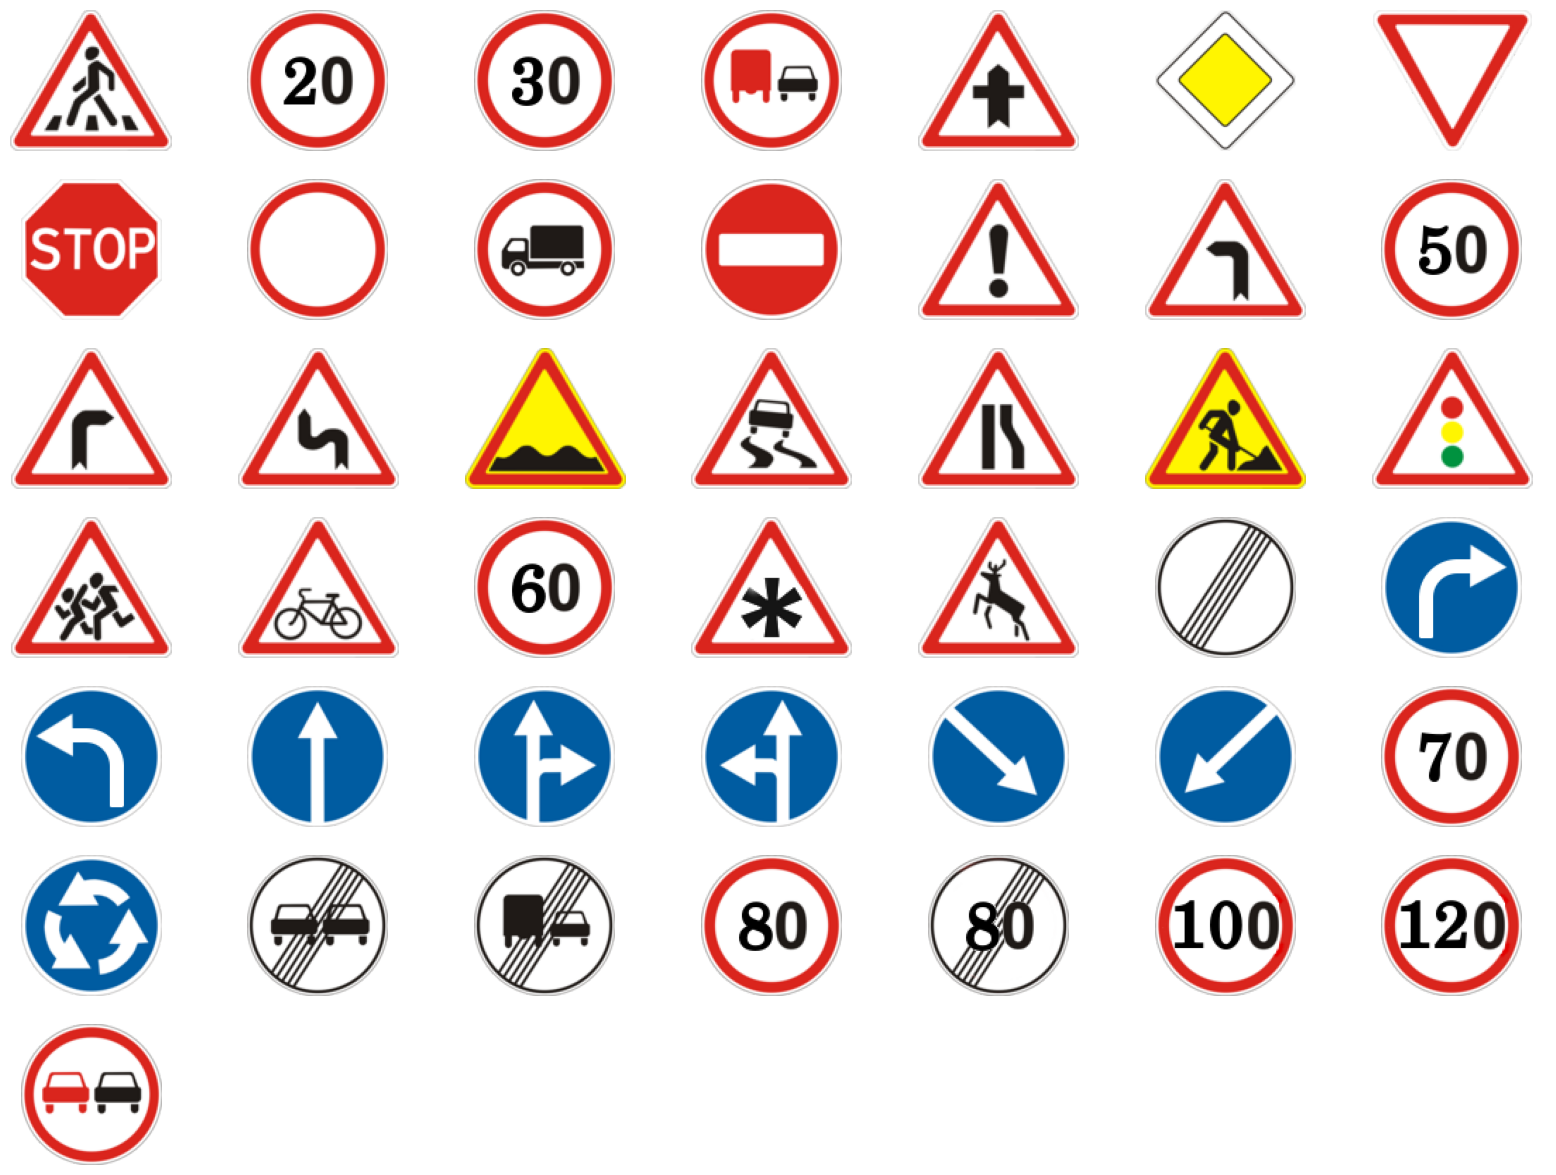

In [18]:
data = np.empty((1, 224, 224, 3))
num_pictures = 43
num_rows = (num_pictures - 1) // 7 + 1
num_cols = min(num_pictures, 7)

signs = [os.path.join(data_path, meta_df.Path.to_list()[i]) for i in range(num_pictures)]

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))
for i, image_path in enumerate(signs):
    image = Image.open(image_path)
    row = i // num_cols
    col = i % num_cols
    axes[row, col].imshow(image)
    axes[row, col].axis('off')

# Remove any remaining empty subplots
for i in range(num_pictures, num_rows * num_cols):
    axes.flat[i].axis('off')

plt.show()

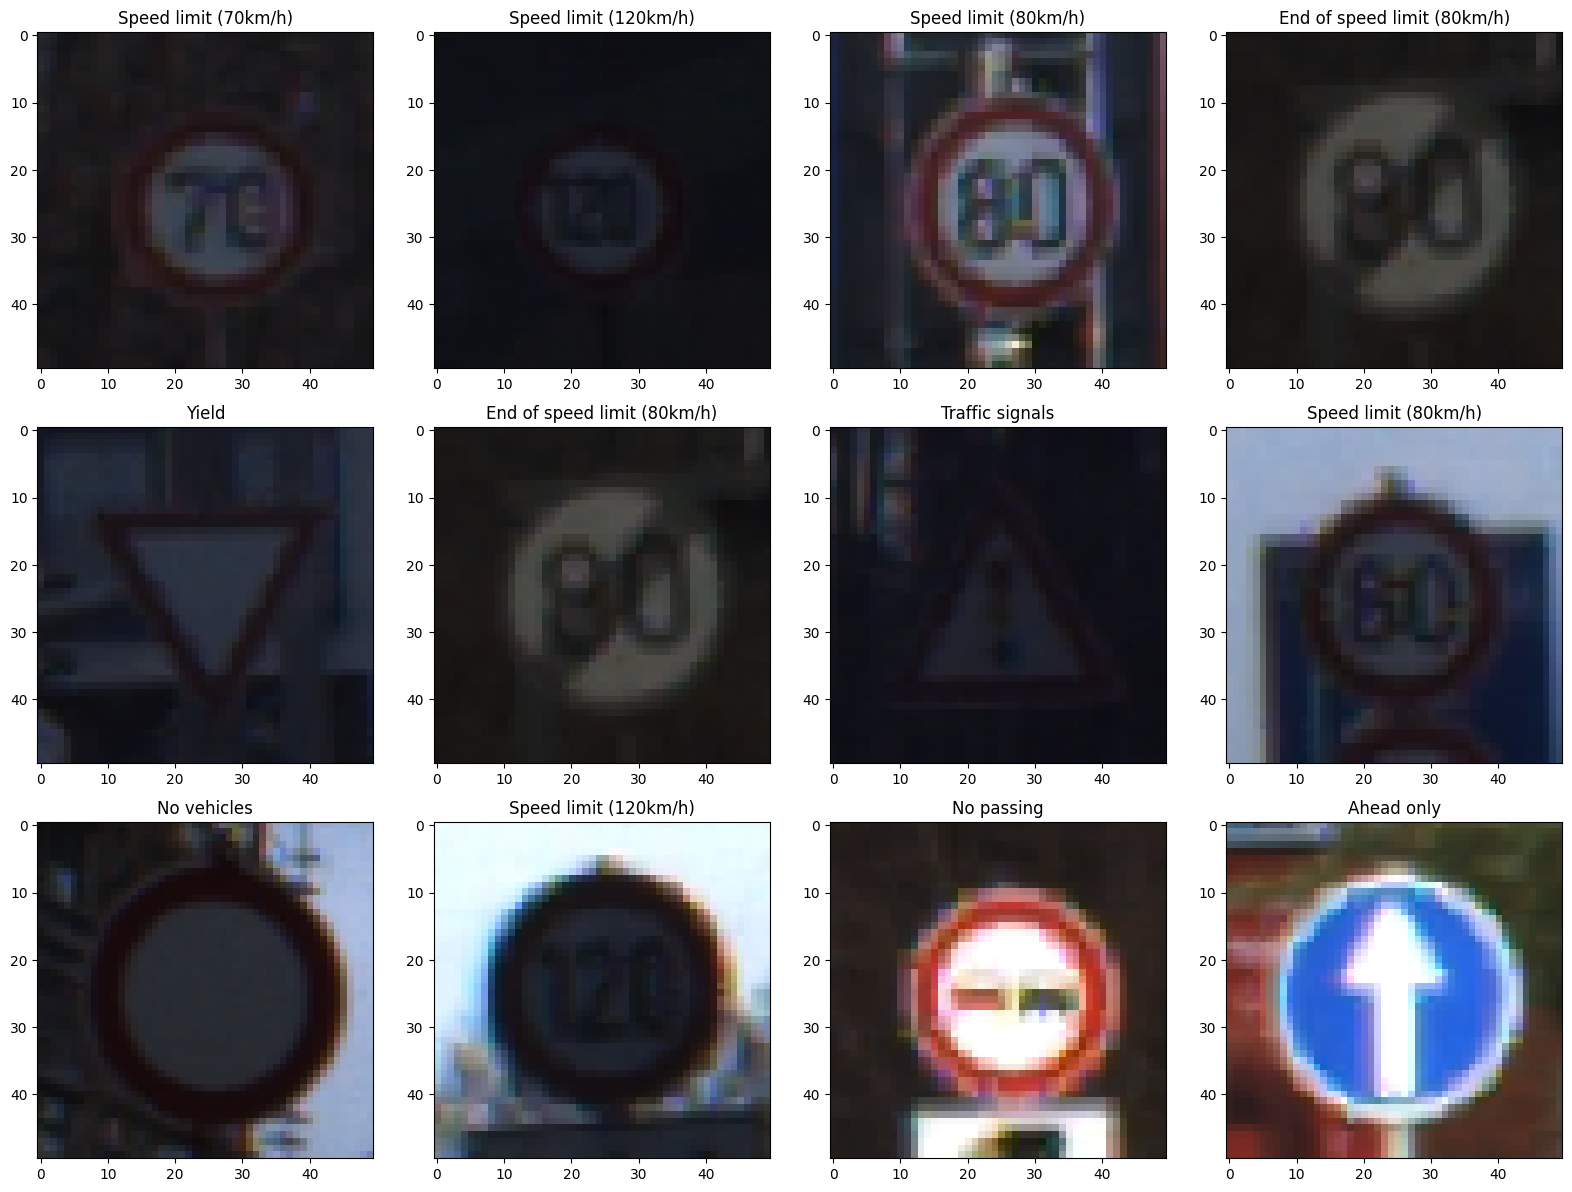

In [19]:
fig,ax=plt.subplots(3,4)
fig.set_size_inches(16,12)
img,y = train_dataset.next()
for i in range(3):
    for j in range (4):
        l=rn.randint(0,batch_size-1)
        label = classes[int(list(train_dataset.class_indices.keys())[np.argmax(y[l])])]
        ax[i,j].imshow(img[l])
        ax[i,j].set_title(label)

plt.tight_layout()

In [20]:
# Assuming you have the train_df DataFrame with the data
classes = train_df["ClassId"].value_counts().head(43)

# Create a Plotly bar chart
fig = go.Figure()

fig.add_trace(go.Bar(
    x=classes.index,
    y=classes.values,
    marker_color='green'
))

fig.update_layout(
    title="Distribution of Class Labels in the dataset",
    xaxis_title="Classes",
    yaxis_title="Counts",
    xaxis=dict(type='category')
)

fig.show()

In [21]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=16, kernel_size=(5,5), activation='relu', input_shape=(height,width,3)),
    keras.layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),

    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    keras.layers.Dropout(rate=0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.25),

    keras.layers.Dense(43, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 16)        1216      
                                                                 
 conv2d_1 (Conv2D)           (None, 42, 42, 32)        12832     
                                                                 
 max_pooling2d (MaxPooling2  (None, 21, 21, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 21, 21, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_2 (Conv2D)           (None, 19, 19, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 17, 17, 64)        3

In [ ]:
alpha=0.01
epochs=25
optim = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer = optim, loss = 'categorical_crossentropy', metrics = ['accuracy'])

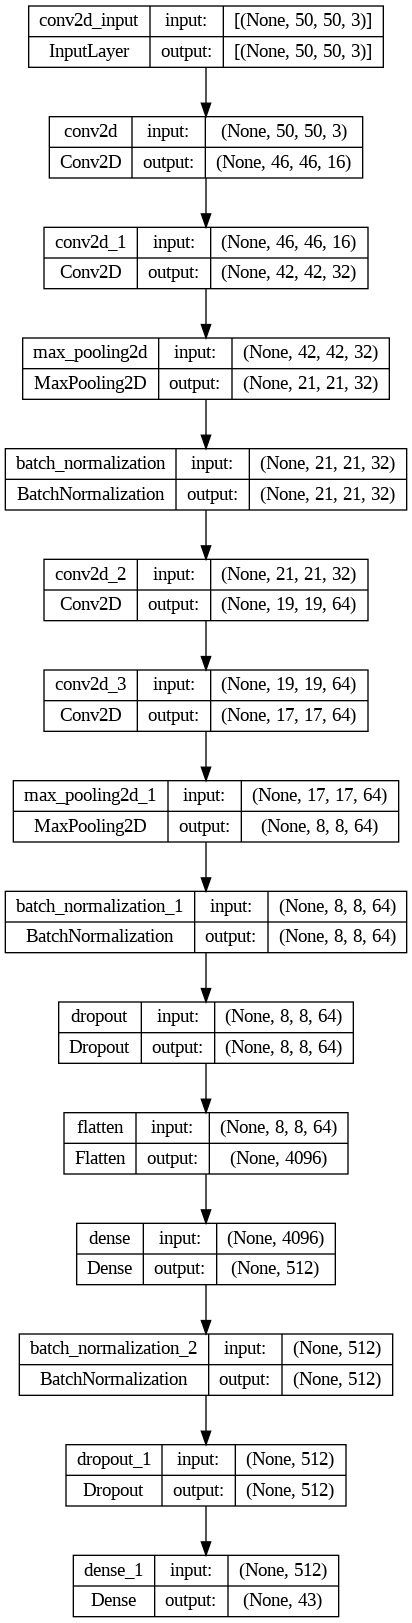

In [ ]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))
Utils.plot_model(model,to_file='model.png',show_shapes=True)

In [ ]:
history = model.fit(train_dataset,
                    steps_per_epoch=len(train_dataset),
                    epochs=epochs,
                    validation_data=test_dataset,
                    validation_steps=len(test_dataset))

In [22]:
mobilenet_model = tf.keras.Sequential([
    MobileNetV2(weights='imagenet', include_top=False, input_shape=(height, width, 3)),
    BatchNormalization(),
    Flatten(),
    Dense(512, activation='sigmoid'),
    Dense(43, activation='softmax')
])

mobilenet_model.summary()

9406464/9406464 [==============================] - 0s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 2, 2, 1280)        2257984   
 tional)                                                         
                                                                 
 batch_normalization_3 (Bat  (None, 2, 2, 1280)        5120      
 chNormalization)                                                
                                                                 
 flatten_1 (Flatten)         (None, 5120)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               2621952   
                                                                 
 dense_3 (Dense)             (None, 43)                22059     
                                                         

In [23]:
image_size=[224,224]
mobileNet = MobileNetV2(input_shape=image_size+[3],weights='imagenet', include_top=False)

In [24]:
for layer in mobileNet.layers:
    layer.trainable=False

In [25]:
model = Sequential()
model.add(mobileNet)
model.add(GlobalAveragePooling2D())
model.add(Dense(units=6, activation="softmax"))

In [26]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001), loss = "categorical_crossentropy")

In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d_1  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_4 (Dense)             (None, 6)                 7686      
                                                                 
Total params: 2265670 (8.64 MB)
Trainable params: 7686 (30.02 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [28]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger

model_check = ModelCheckpoint('best_model.h5', monitor='val_accuracy', verbose=0, save_best_only=True, mode='max')

early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=5, verbose=0, mode='max', restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

csv_logger = CSVLogger('train_log.csv', separator=',')

In [29]:
callbacks=[model_check, early, reduce_lr, csv_logger]

In [30]:
print(len(train_dataset))
print(len(test_dataset))

210
53


In [31]:
alpha=0.001
epochs=5
optim = keras.optimizers.Adam(learning_rate=alpha)
mobilenet_model.compile(optimizer = optim, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [32]:
mobilenet_history = mobilenet_model.fit(
  train_dataset,
  validation_data=test_dataset,
  epochs=10,
  steps_per_epoch=len(train_dataset),
  validation_steps=len(test_dataset),
  callbacks=callbacks
)

Epoch 1/10
210/210 [==============================] - ETA: 0s - loss: 0.5216 - accuracy: 0.8458

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



210/210 [==============================] - 63s 152ms/step - loss: 0.5216 - accuracy: 0.8458 - val_loss: 4.2099 - val_accuracy: 0.1550 - lr: 0.0010
Epoch 2/10
210/210 [==============================] - 29s 140ms/step - loss: 0.0787 - accuracy: 0.9768 - val_loss: 2.2064 - val_accuracy: 0.4955 - lr: 0.0010
Epoch 3/10
210/210 [==============================] - 28s 131ms/step - loss: 0.0664 - accuracy: 0.9804 - val_loss: 2.9645 - val_accuracy: 0.3336 - lr: 0.0010
Epoch 4/10
210/210 [==============================] - 28s 131ms/step - loss: 0.0358 - accuracy: 0.9898 - val_loss: 1.2604 - val_accuracy: 0.6944 - lr: 0.0010
Epoch 5/10
210/210 [==============================] - 29s 137ms/step - loss: 0.0376 - accuracy: 0.9899 - val_loss: 0.9454 - val_accuracy: 0.7873 - lr: 0.0010
Epoch 6/10
210/210 [==============================] - 27s 127ms/step - loss: 0.0382 - accuracy: 0.9891 - val_loss: 0.9045 - val_accuracy: 0.7834 - lr: 0.0010
Epoch 7/10
210/210 [==============================] - 29s 138ms

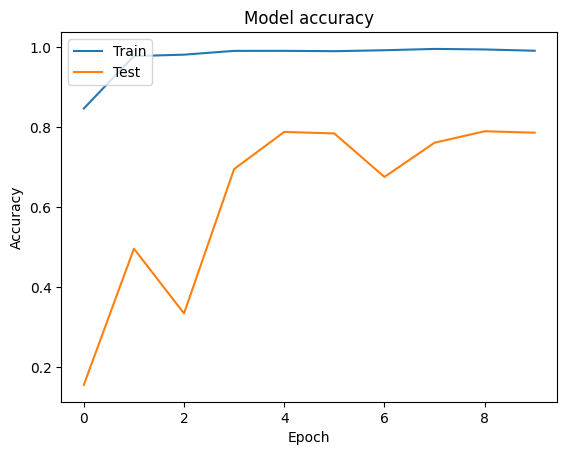

In [35]:
plt.plot(mobilenet_history.history['accuracy'])
plt.plot(mobilenet_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()



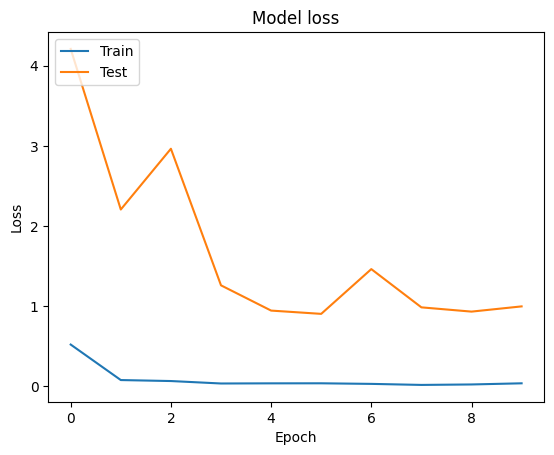

In [34]:
plt.plot(mobilenet_history.history['loss'])
plt.plot(mobilenet_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
#predictions = model.predict(test_dataset)

53/53 [==============================] - 6s 84ms/step


In [36]:
model.save("mobilenet_model.h5")